In [1]:
import numpy as np 
import pandas as pd 
import matplotlib.pyplot as plt
from datetime import datetime as dt


In [16]:

#讀取平安銀行歷史數據
df = pd.read_csv('./000001.csv') 

In [17]:
print(np.shape(df))
df.head()

(611, 14)


,date,open,high,close,low,volume,price_change,p_change,ma5,ma10,ma20,v_ma5,v_ma10,v_ma20
0,2019-05-30,12.32,12.38,12.22,12.11,646284.62,-0.18,-1.45,12.366,12.390,12.579,747470.29,739308.42,953969.39
1,2019-05-29,12.36,12.59,12.40,12.26,666411.50,-0.09,-0.72,12.380,12.453,12.673,751584.45,738170.10,973189.95
2,2019-05-28,12.31,12.55,12.49,12.26,880703.12,0.12,0.97,12.380,12.505,12.742,719548.29,781927.80,990340.43
3,2019-05-27,12.21,12.42,12.37,11.93,1048426.00,0.02,0.16,12.394,12.505,12.824,689649.77,812117.30,1001879.10
4,2019-05-24,12.35,12.45,12.35,12.31,495526.19,0.06,0.49,12.396,12.498,12.928,637251.61,781466.47,1046943.98


股票数据的特征

* date：日期
* open：开盘价
* high：最高价
* close：收盘价
* low：最低价
* volume：成交量
* price_change：价格变动
* p_change：涨跌幅
* ma5：5日均价
* ma10：10日均价
* ma20:20日均价
* v_ma5:5日均量
* v_ma10:10日均量
* v_ma20:20日均量

In [29]:
# date轉換為日期

df['date'] = pd.to_datetime(df['date'])
df = df.set_index('date')
# 按照時間順序排列
df.sort_values(by=['date'], inplace=True, ascending=True)
df.tail()

,open,high,close,low,volume,price_change,p_change,ma5,ma10,ma20,v_ma5,v_ma10,v_ma20,label
date,,,,,,,,,,,,,,
2019-05-24,12.35,12.45,12.35,12.31,495526.19,0.06,0.49,12.396,12.498,12.928,637251.61,781466.47,1046943.98,12.44
2019-05-27,12.21,12.42,12.37,11.93,1048426.00,0.02,0.16,12.394,12.505,12.824,689649.77,812117.30,1001879.10,12.38
2019-05-28,12.31,12.55,12.49,12.26,880703.12,0.12,0.97,12.380,12.505,12.742,719548.29,781927.80,990340.43,12.56
2019-05-29,12.36,12.59,12.40,12.26,666411.50,-0.09,-0.72,12.380,12.453,12.673,751584.45,738170.10,973189.95,12.40
2019-05-30,12.32,12.38,12.22,12.11,646284.62,-0.18,-1.45,12.366,12.390,12.579,747470.29,739308.42,953969.39,12.29


In [30]:
# 檢查缺失值

df.dropna(axis=0 , inplace=True)
df.isna().sum()

open            0
high            0
close           0
low             0
volume          0
price_change    0
p_change        0
ma5             0
ma10            0
ma20            0
v_ma5           0
v_ma10          0
v_ma20          0
label           0
dtype: int64

In [31]:
Min_date = df.index.min()
Max_date = df.index.max()
print ("First date is",Min_date)
print ("Last date is",Max_date)
print (Max_date - Min_date)

First date is 2016-12-06 00:00:00
Last date is 2019-05-30 00:00:00
905 days 00:00:00


### 線性回歸

In [32]:
from sklearn.linear_model import LinearRegression
from sklearn import preprocessing


In [33]:
# new columns 預測值，根據當前數據預測5天後的收盤價
num = 5 # 預測5天後的情況
df['label'] = df['close'].shift(-num) 
                                     
print(df.shape)

(606, 14)


In [34]:
# drop columns 'label', 'price_change', 'p_change', 
Data = df.drop(['label', 'price_change', 'p_change'],axis=1)
Data.tail()

,open,high,close,low,volume,ma5,ma10,ma20,v_ma5,v_ma10,v_ma20
date,,,,,,,,,,,
2019-05-24,12.35,12.45,12.35,12.31,495526.19,12.396,12.498,12.928,637251.61,781466.47,1046943.98
2019-05-27,12.21,12.42,12.37,11.93,1048426.00,12.394,12.505,12.824,689649.77,812117.30,1001879.10
2019-05-28,12.31,12.55,12.49,12.26,880703.12,12.380,12.505,12.742,719548.29,781927.80,990340.43
2019-05-29,12.36,12.59,12.40,12.26,666411.50,12.380,12.453,12.673,751584.45,738170.10,973189.95
2019-05-30,12.32,12.38,12.22,12.11,646284.62,12.366,12.390,12.579,747470.29,739308.42,953969.39


In [35]:
X = Data.values
X = preprocessing.scale(X)
X = X[:-num]

df.dropna(inplace=True)
Target = df.label
y = Target.values

print(np.shape(X), np.shape(y))

(601, 11) (601,)


In [36]:
# 將數據分為預測數據和測試數據
X_train, y_train = X[0:550, :], y[0:550]
X_test, y_test = X[550:, -51:], y[550:606]
print(X_train.shape)
print(y_train.shape)
print(X_test.shape)
print(y_test.shape)

(550, 11)
(550,)
(51, 11)
(51,)


In [37]:
lr = LinearRegression()
lr.fit(X_train, y_train)
lr.score(X_test, y_test) 

0.014438635616478623

In [38]:
# 做預測

X_Predict = X[-num:]
Forecast = lr.predict(X_Predict)
print(Forecast)
print(y[-num:])
print(X_Predict)

[12.49032506 12.44361604 12.5489738  12.31110781 12.26585353]
[12.35 12.37 12.49 12.4  12.22]
[[ 1.33125866  1.1899868   1.01204263  1.09605367 -0.09595564  1.12924788
   1.16550482  1.7213016  -0.19369041  0.26813403  0.25943763]
 [ 0.97015821  0.95310998  0.97420226  1.02384853 -0.38166106  1.13943271
   1.13398108  1.6562867  -0.1763493  -0.00913758  0.23458193]
 [ 1.00183369  1.06851151  1.08772338  1.09605367 -0.47002066  1.14834444
   1.10889075  1.59783897 -0.35218064 -0.08073906  0.26017878]
 [ 1.10953031  0.97133127  0.98681572  1.06979726 -0.82998871  1.08214301
   1.09602392  1.52165991 -0.58502826 -0.17913431  0.1757023 ]
 [ 0.90047216  0.8802248   0.9174417   0.95164339 -0.57298887  1.01084916
   1.10438736  1.46058531 -0.57258106 -0.36582905  0.10086176]]


### 畫預測結果

In [39]:
# 預測 2019-05-13 到 2019-05-17 , 一共 5 天的收盤價
trange = pd.date_range('2019-05-13', periods=num, freq='d')
trange

DatetimeIndex(['2019-05-13', '2019-05-14', '2019-05-15', '2019-05-16',
               '2019-05-17'],
              dtype='datetime64[ns]', freq='D')

In [40]:
# 預測的dataframe
Predict_df = pd.DataFrame(Forecast, index=trange)
Predict_df.columns = ['forecast']
Predict_df

,forecast
2019-05-13,12.490325
2019-05-14,12.443616
2019-05-15,12.548974
2019-05-16,12.311108
2019-05-17,12.265854


In [41]:
# 將預測值加到原本的dataframe
df = pd.read_csv('/Users/ding/Desktop/貪心學院-機器學習/Machine-Learning-master/3.LinearRegression.LogisticRegression/LinearRegression/000001.csv') 
df['date'] = pd.to_datetime(df['date'])
df = df.set_index('date')
# sort by date
df.sort_values(by=['date'], inplace=True, ascending=True)
df_concat = pd.concat([df, Predict_df], axis=1)

df_concat = df_concat[df_concat.index.isin(Predict_df.index)]
df_concat.tail(num)

,open,high,close,low,volume,price_change,p_change,ma5,ma10,ma20,v_ma5,v_ma10,v_ma20,forecast
2019-05-13,12.33,12.54,12.30,12.23,741917.75,-0.38,-3.00,12.538,13.143,13.637,1107915.51,1191640.89,1211461.61,12.490325
2019-05-14,12.20,12.75,12.49,12.16,1182598.12,0.19,1.54,12.446,12.979,13.585,1129903.46,1198753.07,1237823.69,12.443616
2019-05-15,12.58,13.11,12.92,12.57,1103988.50,0.43,3.44,12.510,12.892,13.560,1155611.00,1208209.79,1254306.88,12.548974
2019-05-16,12.93,12.99,12.85,12.78,634901.44,-0.07,-0.54,12.648,12.767,13.518,971160.96,1168630.36,1209357.42,12.311108
2019-05-17,12.92,12.93,12.44,12.36,965000.88,-0.41,-3.19,12.600,12.626,13.411,925681.34,1153473.43,1138638.70,12.265854


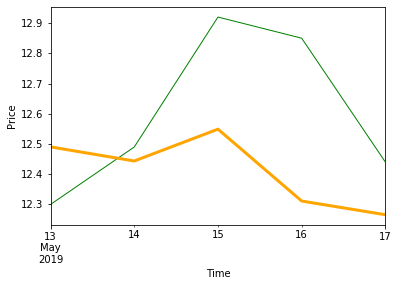

In [42]:
# 畫預測與實際的重合圖

df_concat['close'].plot(color='green', linewidth=1)
df_concat['forecast'].plot(color='orange', linewidth=3)
plt.xlabel('Time')
plt.ylabel('Price')
plt.show()

In [43]:
# 理解模型
for idx, col_name in enumerate(['open', 'high', 'close', 'low', 'volume', 'ma5', 'ma10', 'ma20', 'v_ma5', 'v_ma10', 'v_ma20']):
    print("The coefficient for {} is {}".format(col_name, lr.coef_[idx]))

The coefficient for open is -0.7326349877914268
The coefficient for high is 0.7518943116464978
The coefficient for close is 0.26014918940378456
The coefficient for low is 1.1098519077848032
The coefficient for volume is 0.010983988255051869
The coefficient for ma5 is -0.3321222602483674
The coefficient for ma10 is 0.21102280569505444
The coefficient for ma20 is 0.2630438916512687
The coefficient for v_ma5 is 0.1738038217558423
The coefficient for v_ma10 is 0.08149593589059678
The coefficient for v_ma20 is -0.26879129068043356
